### **[LeetCode Link](https://leetcode-cn.com/problems/rotate-list/solution/xuan-zhuan-lian-biao-by-leetcode/)**

## 直觉
链表中的点已经相连，一次旋转操作意味着：
* 先将链表闭合成环
* 找到相应的位置断开这个环，确定新的链表头和链表尾

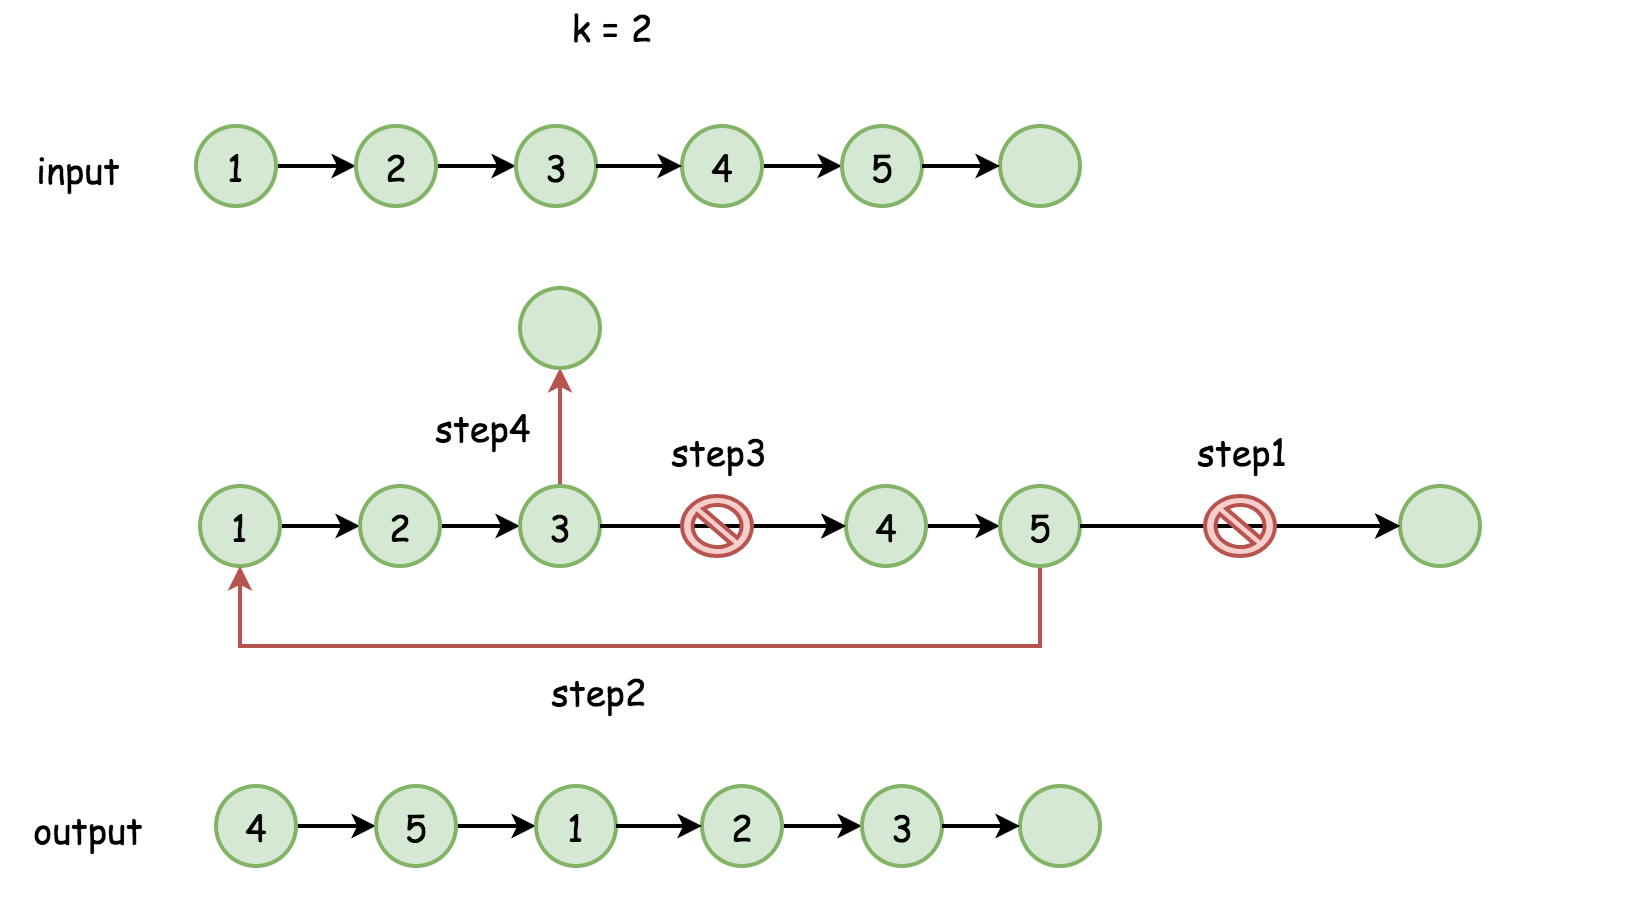

> 新的链表头在哪里？

在位置 `n-k` 处，其中 `n` 是链表中点的个数，新的链表尾就在头的前面，位于位置 `n-k-1`。

>* 我们这里假设 `k < n`
>* 如果 `k >= n` 怎么处理？

`k` 可以被写成 `k = (k // n) * n + k % n` 两者加和的形式，其中前面的部分不影响最终的结果，因此只需要考虑 `k%n` 的部分，这个值一定比 `n` 小。

### 算法
算法实现很直接：
找到旧的尾部并将其与链表头相连 `old_tail.next = head`，整个链表闭合成环，同时计算出链表的长度 `n`。
找到新的尾部，第 `(n - k % n - 1)` 个节点 ，新的链表头是第 `(n - k % n)` 个节点。
断开环 `new_tail.next = None`，并返回新的链表头 `new_head`。



In [ ]:
class Solution:
    def rotateRight(self, head: 'ListNode', k: 'int') -> 'ListNode':
        # base cases
        if not head:
            return None
        if not head.next:
            return head
        
        # close the linked list into the ring
        old_tail = head
        n = 1
        while old_tail.next:
            old_tail = old_tail.next
            n += 1
        old_tail.next = head
        
        # find new tail : (n - k % n - 1)th node
        # and new head : (n - k % n)th node
        new_tail = head
        for i in range(n - k % n - 1):
            new_tail = new_tail.next
        new_head = new_tail.next
        
        # break the ring
        new_tail.next = None
        
        return new_head

In [ ]:
class Solution:
    def rotateRight(self, head: ListNode, k: int) -> ListNode:

        def rotation(head):
            c = head
            tmp = c.val
            while c.next:
                pre = c.next.val
                c.next.val = tmp
                tmp = pre
                c = c.next
            dummy.next.val = tmp

        def linklist_length(head):
            length = 0
            while head:
                length+=1
                head = head.next
            return length

        if not head or not head.next: return head
        lenz = linklist_length(head)
        dummy = ListNode(-1)
        dummy.next = head
        for _ in range(k % lenz):
            rotation(dummy.next)
        return dummy.next